In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create simple 2D dataset (AND-like logic)
X = np.array([[0,0],
              [0,1],
              [1,0],
              [1,1]])

# Labels: let's use 1 for positive class, -1 for negative class (Hebbian prefers bipolar)
y = np.array([-1, -1, -1, 1])

# Add bias input (1) to each sample
X_bias = np.hstack([X, np.ones((X.shape[0],1))])  # shape (4,3)

print("Input samples (with bias):\n", X_bias)
print("Labels:", y)

Input samples (with bias):
 [[0. 0. 1.]
 [0. 1. 1.]
 [1. 0. 1.]
 [1. 1. 1.]]
Labels: [-1 -1 -1  1]


In [ ]:
np.random.seed(42)
input_dim = X_bias.shape[1]  # 3 including bias

# Initialize weights randomly (small values)
weights = np.random.uniform(-0.5, 0.5, size=input_dim)

learning_rate = 0.1
epochs = 50

print("Initial weights:", weights)


Initial weights: [-0.12545988  0.45071431  0.23199394]


In [ ]:
for epoch in range(epochs):
    errors = 0
    for xi, target in zip(X_bias, y):
        net_input = np.dot(weights, xi)
        prediction = 1 if net_input >= 0 else -1
        error = target - prediction
        if error != 0:
            weights += learning_rate * error * xi
            errors += 1
    print(f"Epoch {epoch+1}: weights = {weights}, errors = {errors}")
    if errors == 0:
        print("Training converged.")
        break


Epoch 1: weights = [0.07454012 0.45071431 0.03199394], errors = 3
Epoch 2: weights = [ 0.27454012  0.45071431 -0.16800606], errors = 3
Epoch 3: weights = [ 0.27454012  0.25071431 -0.36800606], errors = 1
Epoch 4: weights = [ 0.27454012  0.25071431 -0.36800606], errors = 0
Training converged.


Predictions: [-1 -1 -1  1]
True labels: [-1 -1 -1  1]


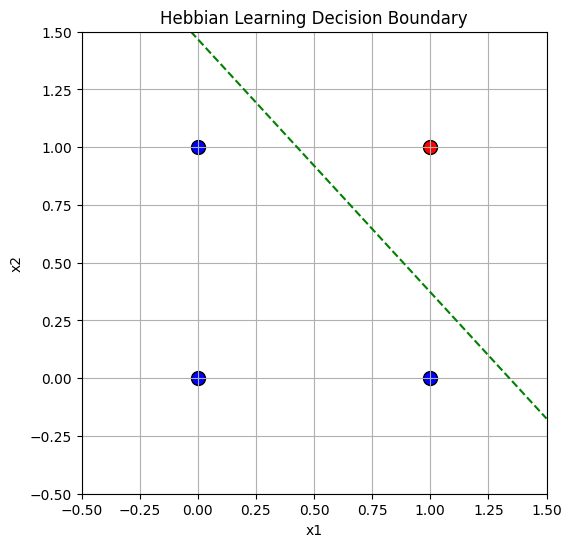

In [ ]:
def predict(x):
    x_bias = np.append(x, 1)  # add bias term
    net_input = np.dot(weights, x_bias)
    return 1 if net_input >= 0 else -1

# Test on dataset
predictions = np.array([predict(x) for x in X])
print("Predictions:", predictions)
print("True labels:", y)

# Plot dataset and decision boundary
plt.figure(figsize=(6,6))

# Plot points by class
for xi, label in zip(X, y):
    color = 'red' if label == 1 else 'blue'
    plt.scatter(xi[0], xi[1], c=color, s=100, edgecolors='k')

# Decision boundary: weights[0]*x + weights[1]*y + weights[2] = 0
x_vals = np.linspace(-0.5, 1.5, 200)
y_vals = -(weights[0]*x_vals + weights[2])/weights[1]
plt.plot(x_vals, y_vals, 'g--')

plt.title("Hebbian Learning Decision Boundary")
plt.xlabel("x1")
plt.ylabel("x2")
plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1.5)
plt.grid(True)
plt.show()
